<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./411_Sentinel-5P_L2_exercise.ipynb"><< 411 - Exercise - Sentinel-5P - Level 2</a><span style="float:right;"><a href="./422_Sentinel-3_SLSTR_NRT_FRP_exercise.ipynb">422 - Exercise - Sentinel-3 SLSTR NRT - FRP >></a></span>

<div class="alert alert-block alert-danger">
<b>40 - EXERCISES</b>
</div>

<div class="alert alert-block alert-danger">

<b>PREREQUISITES </b>

The following **20 - DATA DISCOVERY** module is a prerequisite:

- [251 - Sentinel-3 OLCI - Level 1 - Load and browse](../20_data_discovery/251_Sentinel-3_OLCI_L1_load_browse.ipynb)    
    
It is recommended to go through the module before you do this exercise workbook.
</div>

<hr>

# 4.2.1 Sentinel-3 OLCI Level 1B data - Red-Green-Blue composites

This notebook is an `exercise workbook`, where you can practise the data handling with Sentinel-3 OLCI Level 1B data. 

Sentinel-3 OLCI Level 1B data products are available as Full (`OL_1_EFR`) and Reduced Resolution (`OL_1_ERR`) data files. The following notebook shows you how `OL_1_EFR` data are structured and how you can generate a RGB (Red, Green, Blue) True- and False-Color image.

True-Color images combine reflectances from the red, green and blue light and resulting images look like real-world images. False-Color composites combine reflectances from the visible (light) and non-visible wavelengths. Depending on the application, specific features might be better identifiable as a false-color composite. 

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code. You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<br>

### Outline

* [1. Load Sentinel-3 OLCI Level 1 channel information as a xarray.Dataset](#load)
* [2. Plot one Sentinel-3 OLCI Level 1 channel information](#plot_channel)
* [3. Load OLCI geographic coordinates](#load_geo_coords)
* [4. Select OLCI channels for a RGB image](#channel_select)
* [5. Apply advanced image processing techniques - Normalization and histogram equalization](#image_processing)
* [6. Georeference the RGB image and visualize it](#georeference)
* [7. Create a False Color RGB image and plot it as georeferenced image](#false_color)

<hr>

#### Load required libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from skimage import exposure

import glob

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='load_browse'></a>Exercise example - California fires - Summer 2020

This exercise aims to get familiar with Sentinel-3 OLCI Level 1B data. The exercise examines the Californian wildfires that occured in August and September 2020.

### <a id='load'></a>1. Load Sentinel-3 OLCI channel information as a `xarray.Dataset`

Sentinel-3 OLCI Level 1B data are dissiminated as `.zip archives` when downloaded. The unzipped folder contains 31 data files in `netCDF` format. Data for each channel is stored in a single `netCDF` file. Additionally, you get information on `qualityFlags`, `time_coordinates` or `geo_coordinates`.

You can see the names of the 31 data files by looping through the data directory. OLCI has 21 spectral bands representing reflectances from optical to the near-infrared. Each spectral band is represented in a channel. The files that end with `_radiance.nc` contain the reflectance information for each channel.

Let us define the directory where the Sentinel-3 data for the Californian fire example are stored. We can also loop through the directory and see the files available.

In [3]:
olci_dir = '../eodata/sentinel3/olci/2020/09/07/S3B_OL_1_EFR____20200907T181635_20200907T181935_20200908T214254_0179_043_141_2340_LN1_O_NT_002.SEN3/'
for i in glob.glob(olci_dir+'*.nc'):
    tmp = i.split('/')
    print(tmp[8])

Oa02_radiance.nc
Oa05_radiance.nc
tie_geometries.nc
removed_pixels.nc
time_coordinates.nc
tie_meteo.nc
Oa17_radiance.nc
Oa03_radiance.nc
Oa10_radiance.nc
Oa14_radiance.nc
Oa04_radiance.nc
Oa08_radiance.nc
Oa13_radiance.nc
qualityFlags.nc
Oa18_radiance.nc
Oa19_radiance.nc
tie_geo_coordinates.nc
Oa12_radiance.nc
Oa20_radiance.nc
Oa16_radiance.nc
Oa09_radiance.nc
Oa01_radiance.nc
Oa11_radiance.nc
Oa07_radiance.nc
instrument_data.nc
Oa15_radiance.nc
Oa06_radiance.nc
geo_coordinates.nc
Oa21_radiance.nc


<br>

The next step is to bring the 21 data files of the spectral bands (channels) together into one `xarray.Dataset` object. You can do this with xarray's function `xr.open_mfdataset`. Since all channel files have the same data structure, you can combine all channels by coordinates using the keyword argument `by_coords`. The result is a `xarray.Dataset` object with 21 data variables. Each channel is represented as a data variable.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which loads all channel information of the folder defined above as `xarray.Dataset`. Call the dataset `olci_xr_mf`. <br>
<br>


**HINT:** <br>
Remember that xarray has a function `open_mfdataset()` that allows to open multiple netcdf files at once.
</div>

In [4]:
# Enter your solution here






In [5]:
olci_xr_mf = xr.open_mfdataset(olci_dir+'*_radiance.nc', combine='by_coords')
olci_xr_mf

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    Oa01_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa02_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa03_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa04_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa05_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa06_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa07_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa08_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa09_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa10_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa11_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa12_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa13_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa14_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa15_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa16_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa17_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa18_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa19_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa20_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
    Oa21_radiance  (rows, columns) float32 dask.array<chunksize=(4091, 4865), meta=np.ndarray>
Attributes:
    absolute_orbit_number:  12348
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2020-09-08T21:42:54Z
    history:                  2020-09-08T21:42:54Z: PUGCoreProcessor /data/ip...
    institution:            LN1
    netCDF_version:         4.2 of Mar 13 2018 10:14:33 $
    product_name:           S3B_OL_1_EFR____20200907T181635_20200907T181935_2...
    references:             S3IPF PDS 004.1 - i2r2 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.08
    start_time:             2020-09-07T18:16:35.055223Z
    stop_time:              2020-09-07T18:19:35.022927Z
    title:                  OLCI Level 1b Product, Radiance Oa01 Data Set

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Have a look at the Dataset `olci_xr_mf` above and investigate the dataset:
- What is the dimension of the dataset?
- How many data variables does it contain?
</div>

The dataset **olci_xr_mf** has two dimensions: `columns` and `rows`. The dataset has 4865 column entries and 4091 row entries.

The dataset has `21 data variables`; each data variable represents one of the 21 OLCI channels (spectral bands).

<br>

### <a id='plot_channel'></a>2. Plot one Sentinel-3 OLCI channel information

To get an impression of one spectral band, you can simply plot one channel of the xarray object with xarray's function  `.plot.imshow()`. Let us plot channel 20 `Oa20_radiance` as an example. The example shows that you can easily visualize the the spectral band information, but without geographic information.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which plots one data variable of the Dataset **olci_xr_mf**, e.g the data variable `Oa20_radiance`.<br> Change the data variable and re-plot it. <br>
<br>

**HINT:** <br>
Make use of xarray's built-in visualization functions, such as `xr.plot.imshow()`.
</div>

In [6]:
# Enter your solution here






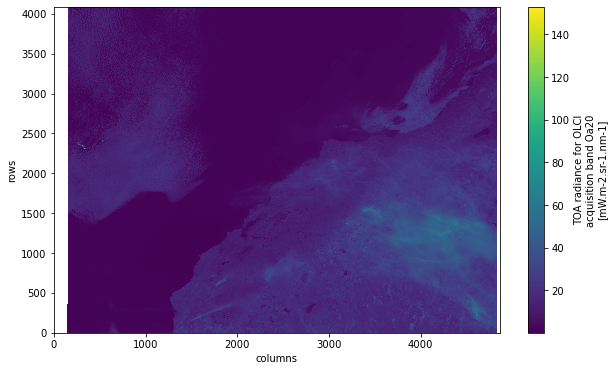

In [7]:
fig = plt.figure(figsize=(10,6))
olci_xr_mf['Oa20_radiance'].plot.imshow()

<br>

### <a id='load_geo_coords'></a>3. Load OLCI geographic coordinates

Eventually, we are interested in geo-referencing the Sentinel-3 OLCI image. For this reason, the next step is to load the **geo_coordinates.nc** file as `xarray.Dataset`.

You can load it as xarray with the function `xr.open_dataset()`. The file is called `geo_coordinates.nc`. You see that the file contains three variables: `latitude`, `longitude` and `altitude`.


<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that loads the file `geo_coordinates.nc` as `xarray.Dataset`. Once loaded, store the `latitude` and `longitude` information separately as data variables and call them `lat` and `lon` respectively. <br>


</div>

In [8]:
# Enter your solution here






In [9]:
olci_geo_coords = xr.open_dataset(olci_dir+'geo_coordinates.nc')
print(olci_geo_coords)

lat = olci_geo_coords.latitude.data
lon = olci_geo_coords.longitude.data

<xarray.Dataset>
Dimensions:    (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    altitude   (rows, columns) float32 ...
    latitude   (rows, columns) float64 ...
    longitude  (rows, columns) float64 ...
Attributes:
    absolute_orbit_number:  12348
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2020-09-08T21:42:54Z
    history:                  2020-09-08T21:42:54Z: PUGCoreProcessor /data/ip...
    institution:            LN1
    netCDF_version:         4.2 of Mar 13 2018 10:14:33 $
    product_name:           S3B_OL_1_EFR____20200907T181635_20200907T181935_2...
    references:             S3IPF PDS 004.1 - i2r2 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.08
    start_time:             2020-09-07T18:16:35.055223Z
    stop_time:              202

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What are the geographic bounds of the dataset?

**HINT:**<br>
You can make use of xarray's built-in functions `xr.max()` and `xr.min()` to retrieve minimum and maxiumum values of a variable.
</div>

**Latitude**:
- min: 29.0885599999999998
- max: 41.989984

**Longitude**:
- min: -129.927426
- max: -112.95917399999999

### <a id='channel_select'></a>4. Select OLCI channels for a RGB (red, green, blue) composite image

Depending on the combination of different OLCI channels, your RGB image might highlight specific phenomena. The channel combination for a True Color RGB (Red, Green, Blue) composite could be:
- Red: `Oa08_radiance`
- Green: `Oa06_radiance`
- Blue: `Oa04_radiance`

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that selects three channels (data variables) from the `olci_xr_mf` dataset with the help of the function [select_channels_for_rgb](../functions.ipynb#rgb_channels). Use the following channel combination:
- **red**: channel `Oa08_radiance`
- **green**: channel `Oa06_radiance`
- **blue**: channel `Oa04_radiance` <br>

Try out different channel combinations.
<br>

<b>HINT:</b><br> With `?select_channels_for_rgb`, you can see what keyword arguments the function requires.
</div>

In [10]:
?select_channels_for_rgb

In [11]:
# Enter your solution here







In [12]:
red, green, blue = select_channels_for_rgb(xarray=olci_xr_mf, 
                                           red_channel='Oa08_radiance', 
                                           green_channel='Oa06_radiance', 
                                           blue_channel='Oa04_radiance')
red

<xarray.DataArray 'Oa08_radiance' (rows: 4091, columns: 4865)>
dask.array<open_dataset-102e7c6740347299a276022356a3edebOa08_radiance, shape=(4091, 4865), dtype=float32, chunksize=(4091, 4865), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    ancillary_variables:  Oa08_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa08
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What are the attributes **long_name** and **units** of e.g. the red channel?

</div>

**Long_name**: TOA radiance for OLCI acquisiation band Oa08

**Units**: mW.m-2.sr-1.nm-1

### <a id='image_processing'></a>5. Apply advanced image processing techniques - Normalization and histogram equalization

Common operations in image processing are **normalization** and **historgram equalization** in order to improve the image's contrast.
Let us first `normalize` the three selected channels and visualize it and in a second step apply a `histogram equalization` and visualize it as well.

`Normalization` changes the range of pixel intensity and normalizes the data range to a scale between 0.0 and 1.0.<br>
`Histogram equalization` is a method in image processing that adjusts the contrast using the image's histogram.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that does the following three steps:
- Normalization of the values of each channel and call the new data variables **redn**, **greenn** and **bluen** respectively. Make use of the function [normalize](../functions.ipynb#normalize),
- Stack together the three channels into a `numpy.dstack` with the function `np.dstack` and call the numpy stack **rgb**, and
- Visualization of the stacked numpy array with `plt.imshow()`.<br>

<br>

<b>NOTE:</b><br> With `?normalize`, you can see what keyword arguments the function requires.
</div>

In [13]:
?normalize

In [14]:
# Enter your solution here







(4091, 4865, 3)


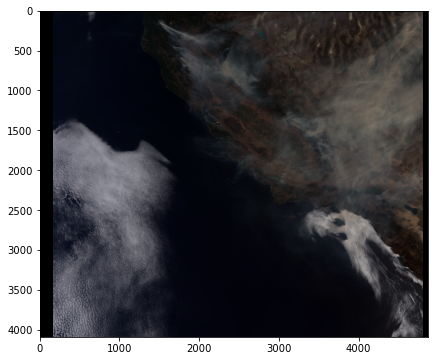

In [15]:
# 1. Normalize the values of the three channels
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

# 2. Stack the normalized channels together into a `numpy stack`
rgb = np.dstack((redn, greenn, bluen))
print(rgb.shape)

# 3. Plot the stacked numpy array
fig = plt.figure(figsize=(10,6))
plt.imshow(rgb)

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What is the shape (dimensions) of the resulting numpy array **rgb**?

</div>

The stacked numpy array has three dimensions: (4091, 4865, 3) - number of columns, number of rows and number of bands / channels.

<br>

The visualized rgb above shows that it might be helpful to sharpen the contrast. Let us apply a `histogram equalization` on the stacked array **rgb**.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that does the following two steps:
- Histogram equalization of the stacked array **rgb**. Use the function `exposure.equalize_adapthist()` from Python's skikit-learn library. Call the new stacked array **rgb_equalized** 
- Visualization of the stacked numpy array with the equalized histogram

</div>

In [16]:
# Enter your solution here







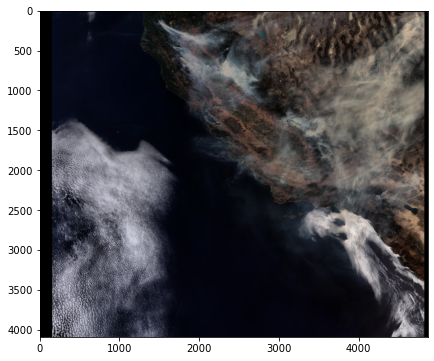

In [17]:
# 1. Histogram equalization
rgb_equalized = exposure.equalize_adapthist(rgb)

# 2. Visualization of the array with the equalized histogram
fig = plt.figure(figsize=(10,6))
plt.imshow(rgb_equalized)

<br>

### <a id='georeference'></a>6. Georeference the RGB image and visualize it

The final step is to georeference the `RGB` composite. Therefore, you need the extracted `lat` and `lon` information extracted above.

The first step is to create a mesh grid that maps the rgb array values onto a array of colour values. The second step is then to visualize the georeferenced image.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that creates a mesh grid, which maps the **rgb_equalized** array values onto an array of colour values. Call the meshed array **colorTuple**.
Use the `mesh_rgb.reshape` function for it.

</div>

In [18]:
# Enter you solution here






In [19]:
mesh_rgb = rgb[:, :, :]
colorTuple = mesh_rgb.reshape((mesh_rgb.shape[0] * mesh_rgb.shape[1]), 3)

<b>

The last step is to visualize the color array and add additional information, e.g. gridlines and coastlines.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that visualizes the georeferenced mesh **colorTuple** as a georeferenced image. Make use of the function [visualize_s3_pcolormesh](../functions.ipynb#visualize_s3_pcolormesh).
Use the following input arrays:
- **colorTuple** as color array and
- **red** as array<br><br>

<b>HINT:</b><br> With `?visualize_s3_pcolormesh`, you can see what keyword arguments the function requires.
</div>

In [20]:
?visualize_s3_pcolormesh

In [21]:
# Enter your solution here







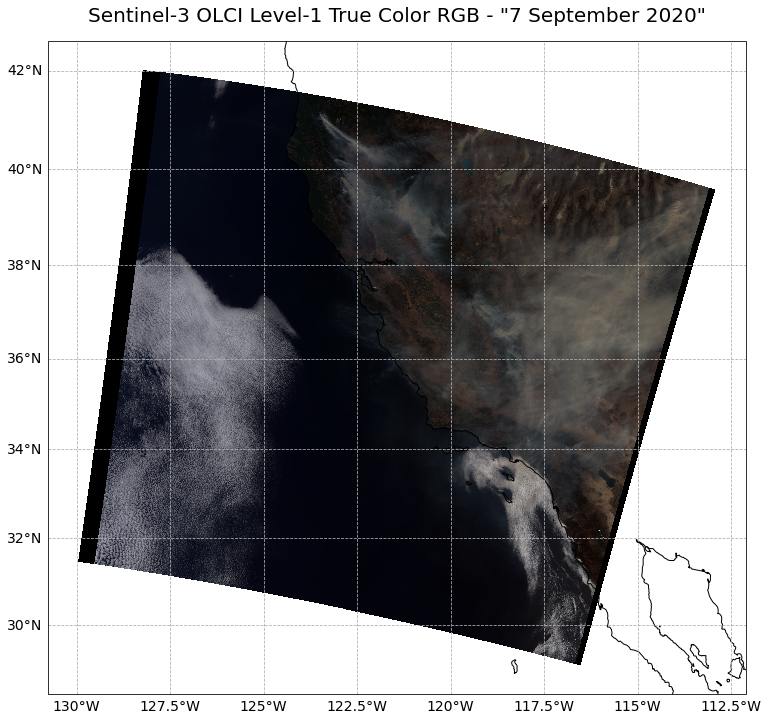

In [22]:
visualize_s3_pcolormesh(color_array=colorTuple, 
                        array=red, 
                        latitude=lat, 
                        longitude=lon, 
                        title='Sentinel-3 OLCI Level-1 True Color RGB - "7 September 2020"')

<br>

### <a id='false_color'></a>7. Create a False Color RGB image and plot it as georeferenced image 

Now it is your turn - repeat the steps above and create a `False Color RGB` and plot it as a georeferenced image.

A false color RGB image can be applied if specific phenomena should be highlighted. A channel combination for Sentinel-3 OLCI data to identify burnt areas and wildfires could be:
- Red: `Oa17_radiance`
- Green: `Oa05_radiance`
- Blue: `Oa02_radiance`

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter the code in the respective code cells in order to execute the following tasks:
1. Select RGB channels with the function [select_channels_for_rgb](../functions.ipynb#select_channels_for_rgb) and use the above channel combination for wildfires and burnt areas.
2. Normalize the selected channels with the function [normalize](../functions.ipynb#normalize)
3. Create a RGB stacked array with `np.dstack`
4. Apply a histogram equalization with the function `exposure.equalize_adapthist`
5. Create a mesh array that maps the array values onto a colour grid
6. Visualize the georeferenced image with the function [visualize_s3_pcolormesh](../functions.ipynb#visualize_s3_pcolormesh)
</div>

In [23]:
# Enter you solution here







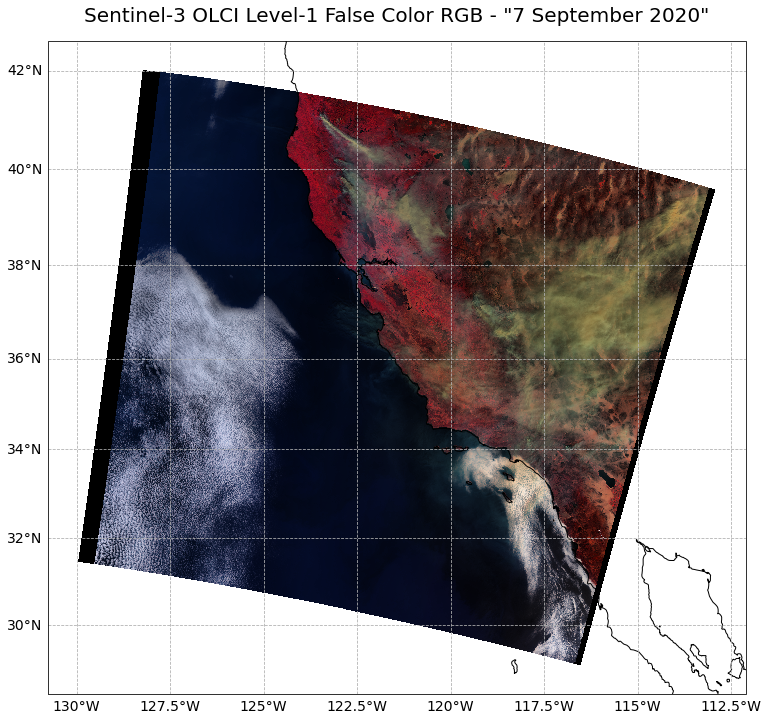

In [24]:
# 1. Select False Color RGB channels
red_fc, green_fc, blue_fc = select_channels_for_rgb(xarray=olci_xr_mf, 
                                                    red_channel='Oa17_radiance', 
                                                    green_channel='Oa05_radiance', 
                                                    blue_channel='Oa02_radiance')

# 2. Normalize the data of the selected channels
redn_fc = normalize(red_fc)
greenn_fc = normalize(green_fc)
bluen_fc = normalize(blue_fc)

# 3. Create a RGB stacked array
rgb_fc = np.dstack((redn_fc, greenn_fc, bluen_fc))

# 4. Apply histogram equalization
rgb_fc = exposure.equalize_adapthist(rgb_fc)

# 5. Create a mesh array that maps the array values onto a colour grid
mesh_rgb = rgb_fc[:, :, :]
colorTuple = mesh_rgb.reshape((mesh_rgb.shape[0] * mesh_rgb.shape[1]), 3)

# 6. Visualize the georeference RGB image
visualize_s3_pcolormesh(color_array=colorTuple, 
                        array=red_fc, 
                        latitude=lat, 
                        longitude=lon, 
                        title='Sentinel-3 OLCI Level-1 False Color RGB - "7 September 2020"')

<br>

The False-Colour image shows well smoke resulting from fires occurring at the Californian coast in August and September 2020.

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./411_Sentinel-5P_L2_exercise.ipynb"><< 411 - Exercise - Sentinel-5P - Level 2</a><span style="float:right;"><a href="./422_Sentinel-3_SLSTR_NRT_FRP_exercise.ipynb">422 - Exercise - Sentinel-3 SLSTR NRT - FRP >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>